<a href="https://colab.research.google.com/github/kabeerbora/1980s_delin/blob/main/visualizations_delin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

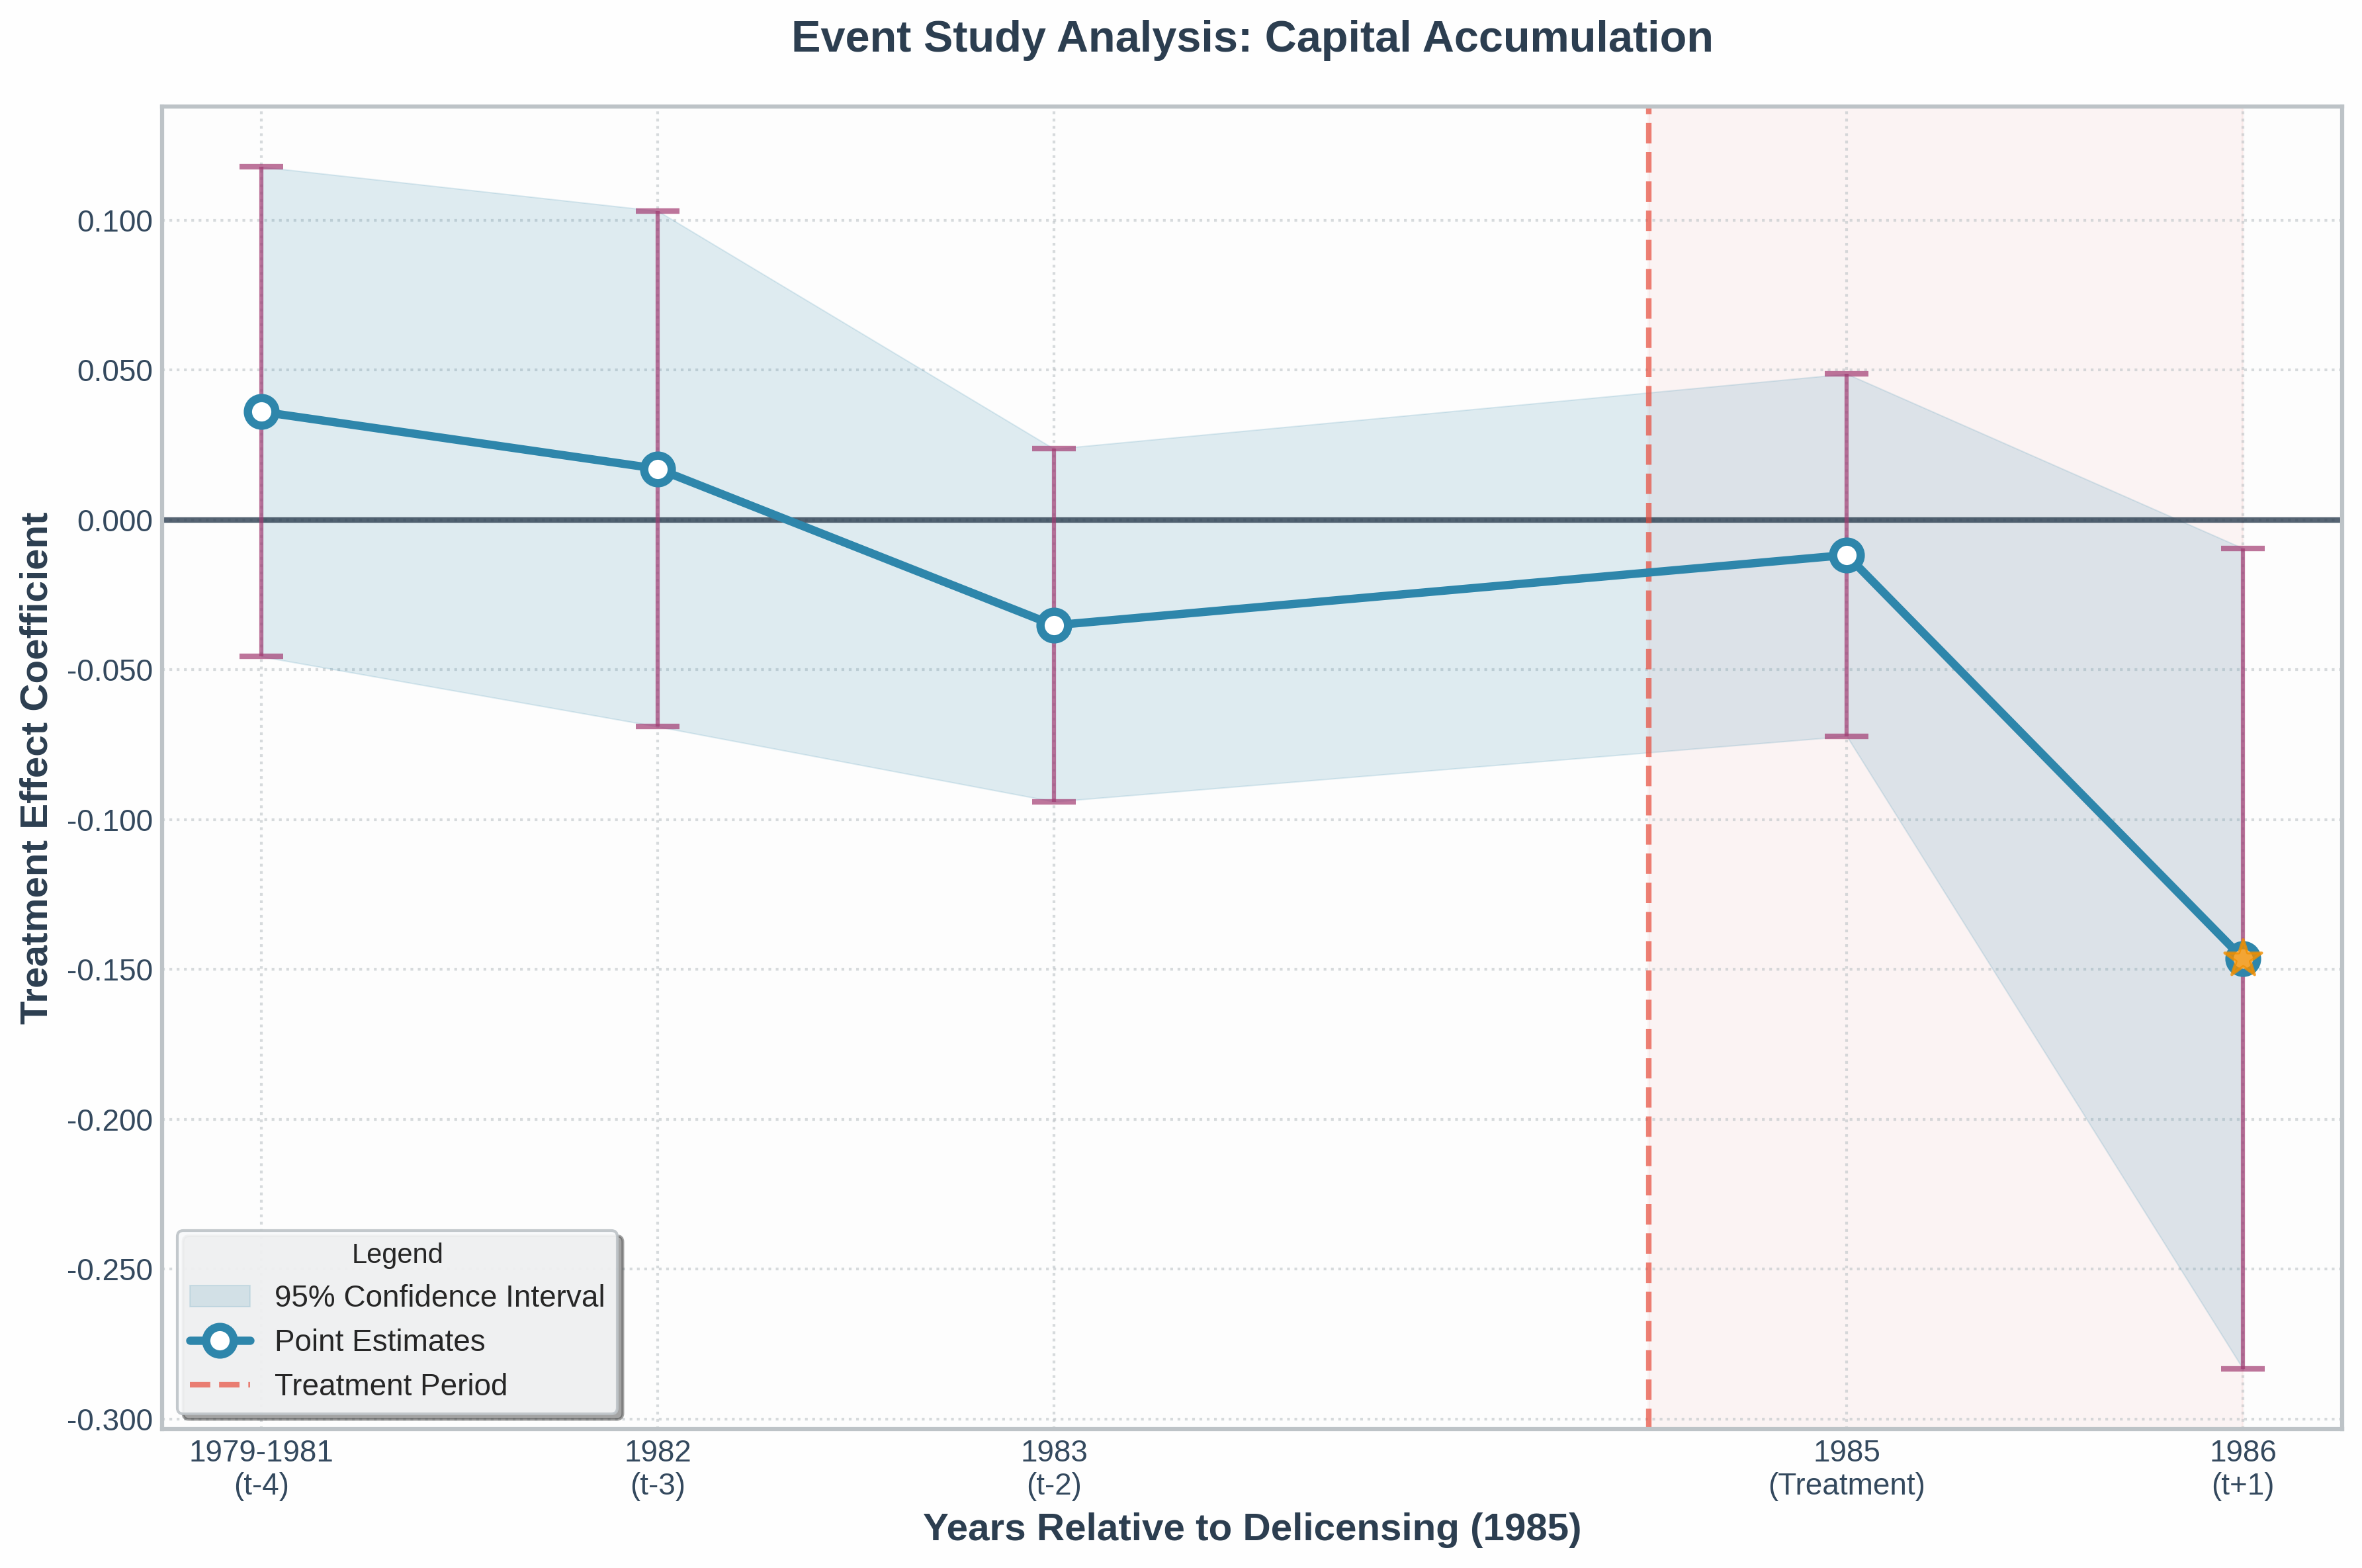

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
time_points = [-4, -3, -2, 0, 1]
estimates = [0.036132, 0.017091, -0.035123, -0.011674, -0.146366]
std_errors = [0.041686, 0.043894, 0.030023, 0.030839, 0.069850]
ci_lower = [est - 1.96 * se for est, se in zip(estimates, std_errors)]
ci_upper = [est + 1.96 * se for est, se in zip(estimates, std_errors)]

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
primary_color = '#2E86AB'
secondary_color = '#A23B72'
accent_color = '#F18F01'
neutral_color = '#C73E1D'
ax.fill_between(time_points, ci_lower, ci_upper,
                color=primary_color, alpha=0.15,
                label='95% Confidence Interval',
                edgecolor=primary_color, linewidth=0.5)

ax.plot(time_points, estimates,
        color=primary_color, linewidth=3,
        marker='o', markersize=10,
        markerfacecolor='white',
        markeredgecolor=primary_color,
        markeredgewidth=3,
        label='Point Estimates',
        zorder=5)

ax.errorbar(time_points, estimates, yerr=[1.96 * se for se in std_errors],
            fmt='none', ecolor=secondary_color, capsize=8, capthick=2,
            alpha=0.7, zorder=4)
for i, (point, est, lower, upper) in enumerate(zip(time_points, estimates, ci_lower, ci_upper)):
    if lower > 0 or upper < 0:
        ax.scatter(point, est, s=200, color=accent_color,
                  marker='*', zorder=6, alpha=0.8)

ax.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.8, linewidth=2, zorder=1)
ax.axvline(x=-0.5, color='#E74C3C', linestyle='--', alpha=0.7, linewidth=2,
           label='Treatment Period', zorder=1)
ax.axvspan(-0.5, max(time_points), alpha=0.05, color='#E74C3C', zorder=0)

ax.set_xlabel('Years Relative to Delicensing (1985)', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Treatment Effect Coefficient', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_title('Event Study Analysis: Capital Accumulation',
             fontsize=16, fontweight='bold', color='#2C3E50', pad=20)

ax.set_xticks(ticks=[-4, -3, -2, 0, 1])
ax.set_xticklabels(['1979-1981\n(t-4)', '1982\n(t-3)', '1983\n(t-2)',
                    '1985\n(Treatment)', '1986\n(t+1)'],
                   fontsize=11, color='#34495E')

ax.tick_params(axis='y', labelsize=11, colors='#34495E')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

ax.grid(True, linestyle=':', alpha=0.6, color='#BDC3C7', linewidth=1)
ax.set_axisbelow(True)
legend = ax.legend(loc='lower left', frameon=True, fancybox=True,
                   shadow=True, fontsize=11, title='Legend')
legend.get_frame().set_facecolor('#F8F9FA')
legend.get_frame().set_edgecolor('#BDC3C7')
legend.get_frame().set_alpha(0.9)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_edgecolor('#BDC3C7')
    spine.set_linewidth(1.5)
fig.patch.set_facecolor('#FEFEFE')
ax.set_facecolor('#FDFDFD')
plt.show()

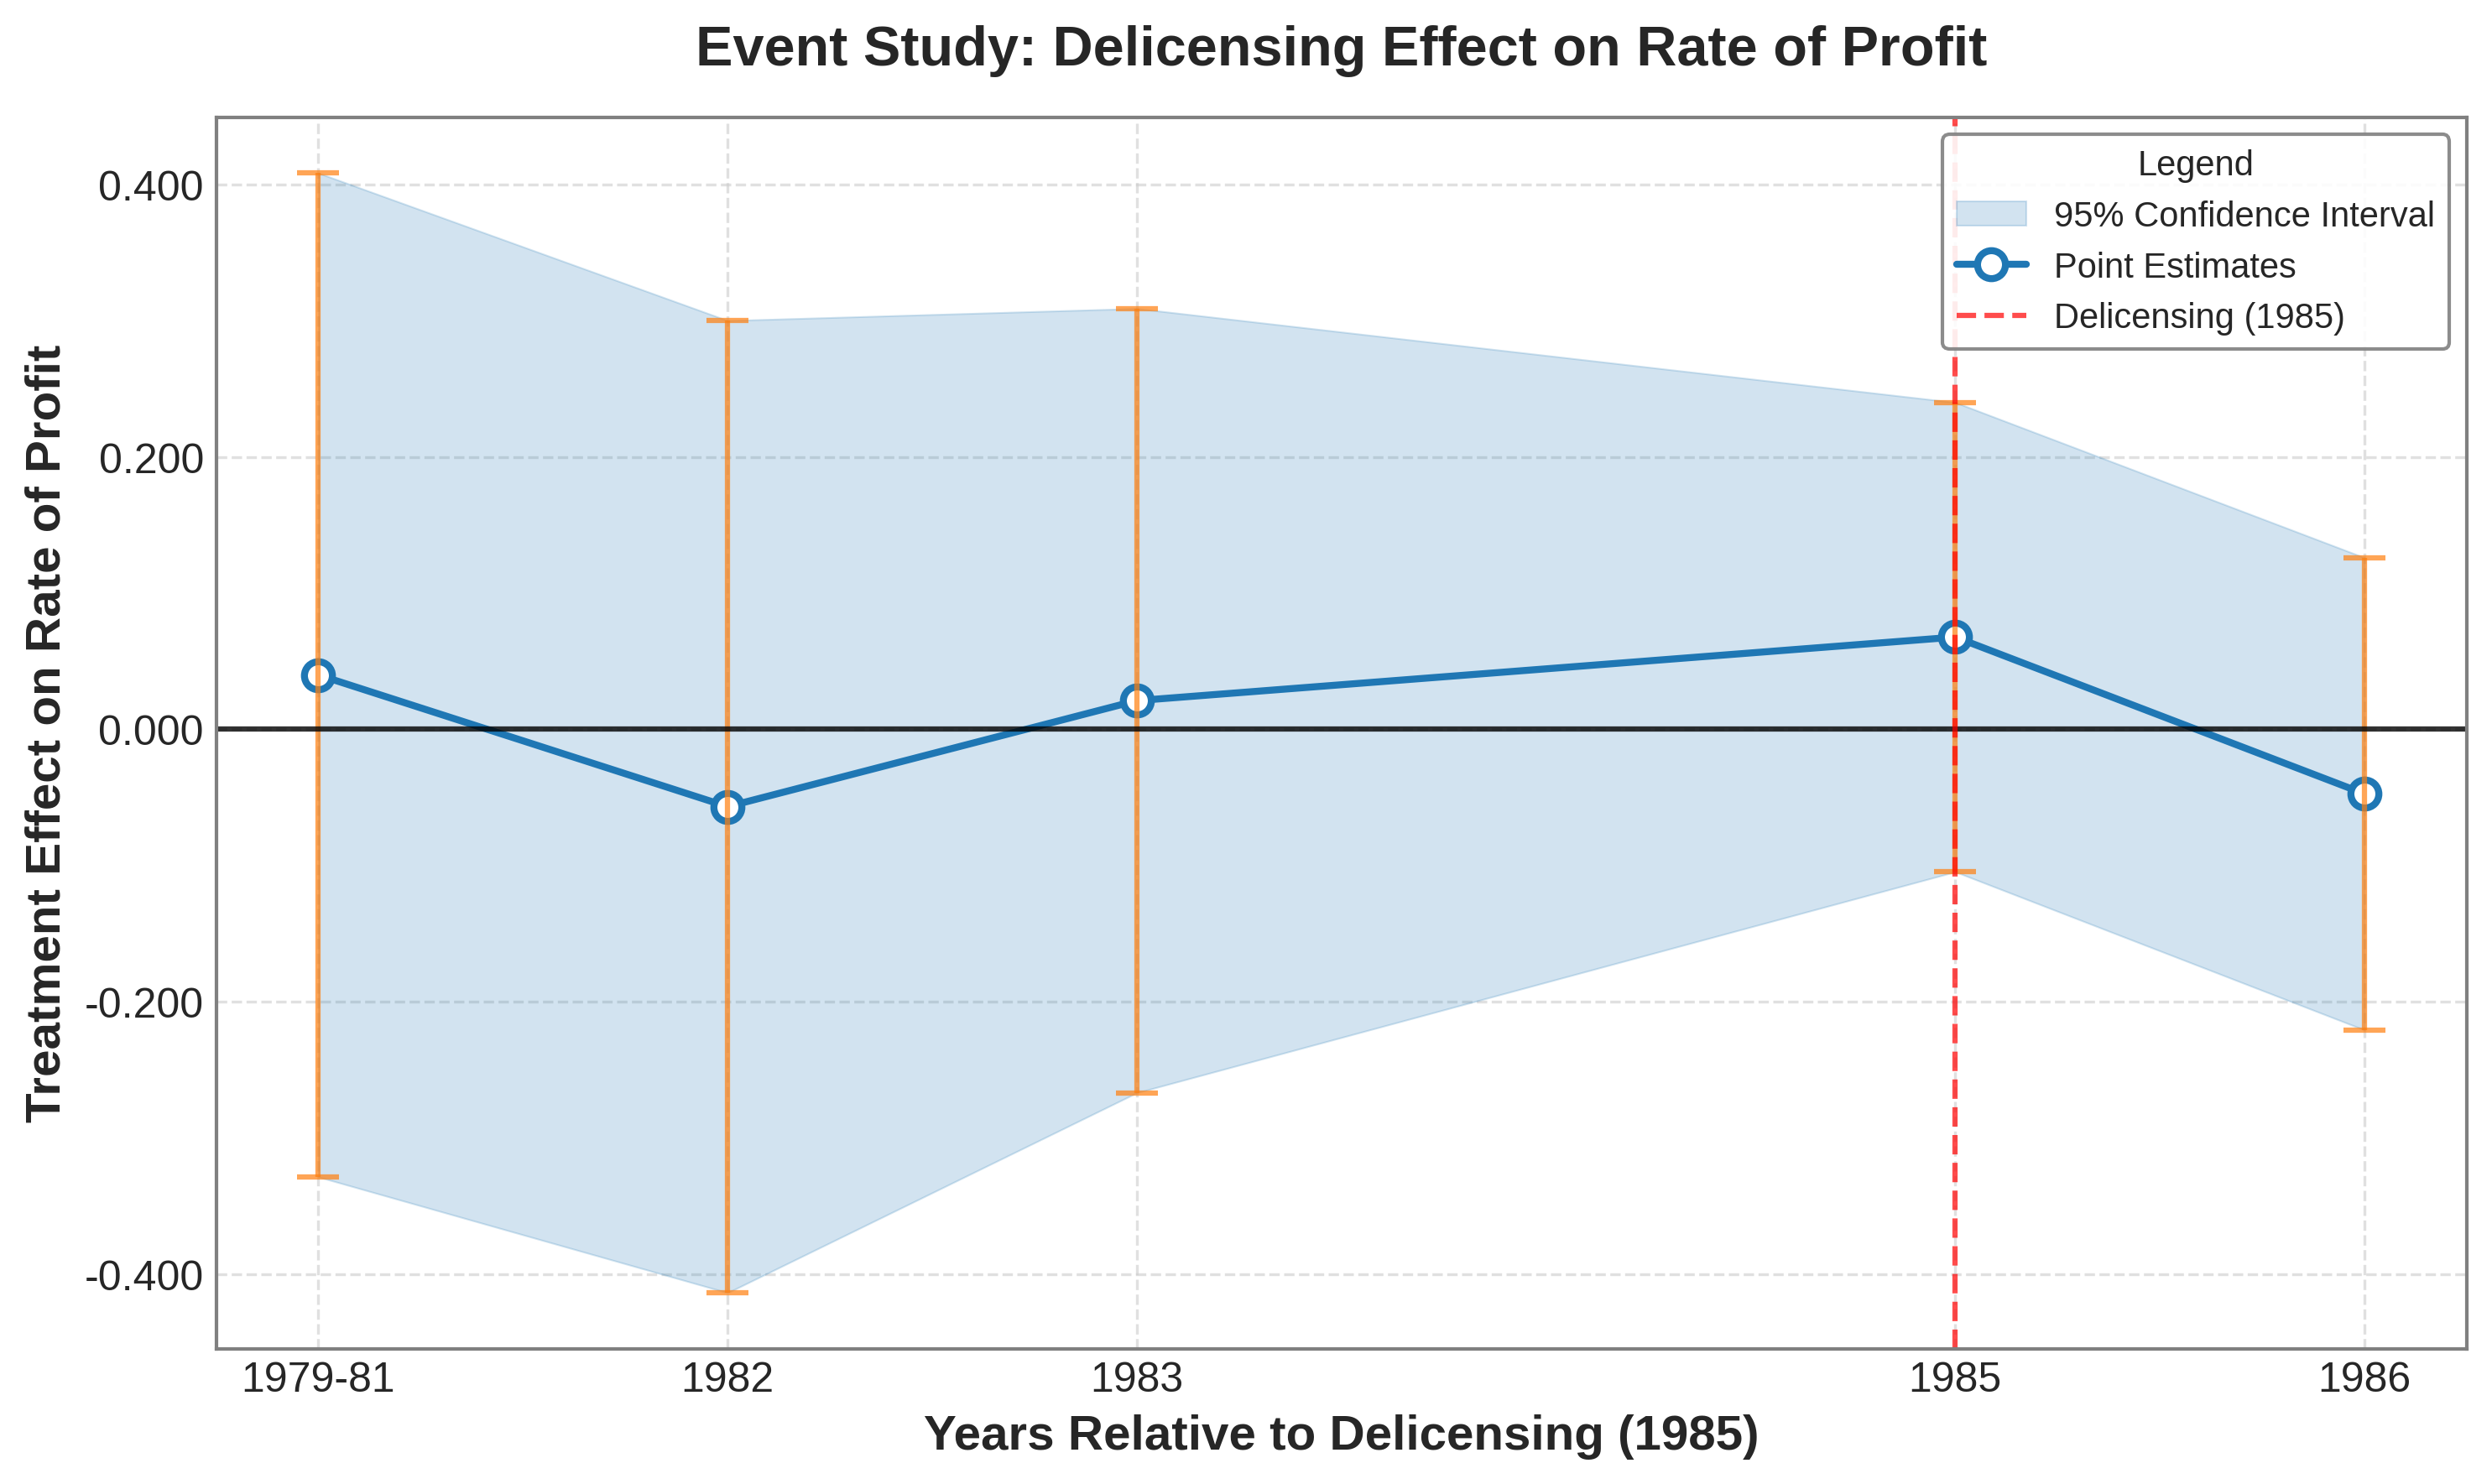

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager


# Data from feols output (rate_of_profit)
time_points = [-4, -3, -2, 0, 1]  # Exclude time_to_treat = 2 (1987)
estimates = [0.039848, -0.056839, 0.021007, 0.067665, -0.047414]
std_errors = [0.188014, 0.182083, 0.146876, 0.087912, 0.088463]

# Calculate 95% confidence intervals
ci_lower = [est - 1.96 * se for est, se in zip(estimates, std_errors)]
ci_upper = [est + 1.96 * se for est, se in zip(estimates, std_errors)]

# Create plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
primary_color = '#1f77b4'  # Blue for consistency
secondary_color = '#ff7f0e'  # Orange for error bars

# Shaded confidence interval
ax.fill_between(time_points, ci_lower, ci_upper,
                color=primary_color, alpha=0.2,
                label='95% Confidence Interval',
                edgecolor=primary_color, linewidth=0.5)

# Plot estimates
ax.plot(time_points, estimates,
        color=primary_color, linewidth=2,
        marker='o', markersize=8,
        markerfacecolor='white',
        markeredgecolor=primary_color,
        markeredgewidth=2,
        label='Point Estimates')

# Error bars
ax.errorbar(time_points, estimates, yerr=[1.96 * se for se in std_errors],
            fmt='none', ecolor=secondary_color, capsize=6, capthick=1.5,
            alpha=0.7)

# Reference lines
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1.5)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=1.5,
           label='Delicensing (1985)')

# Customize axes
ax.set_xlabel('Years Relative to Delicensing (1985)', fontsize=14, fontweight='bold')
ax.set_ylabel('Treatment Effect on Rate of Profit', fontsize=14, fontweight='bold')
ax.set_title('Event Study: Delicensing Effect on Rate of Profit',
             fontsize=16, fontweight='bold', pad=15)
ax.set_xticks([-4, -3, -2, 0, 1])
ax.set_xticklabels(['1979-81', '1982', '1983', '1985', '1986'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

# Legend
legend = ax.legend(loc='upper right', frameon=True, fontsize=10, title='Legend')
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_alpha(0.9)

# Adjust layout and spines
plt.tight_layout()
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

# Background
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Save for LaTeX
plt.savefig('event_study_profit.pdf', format='pdf', bbox_inches='tight')
plt.show()

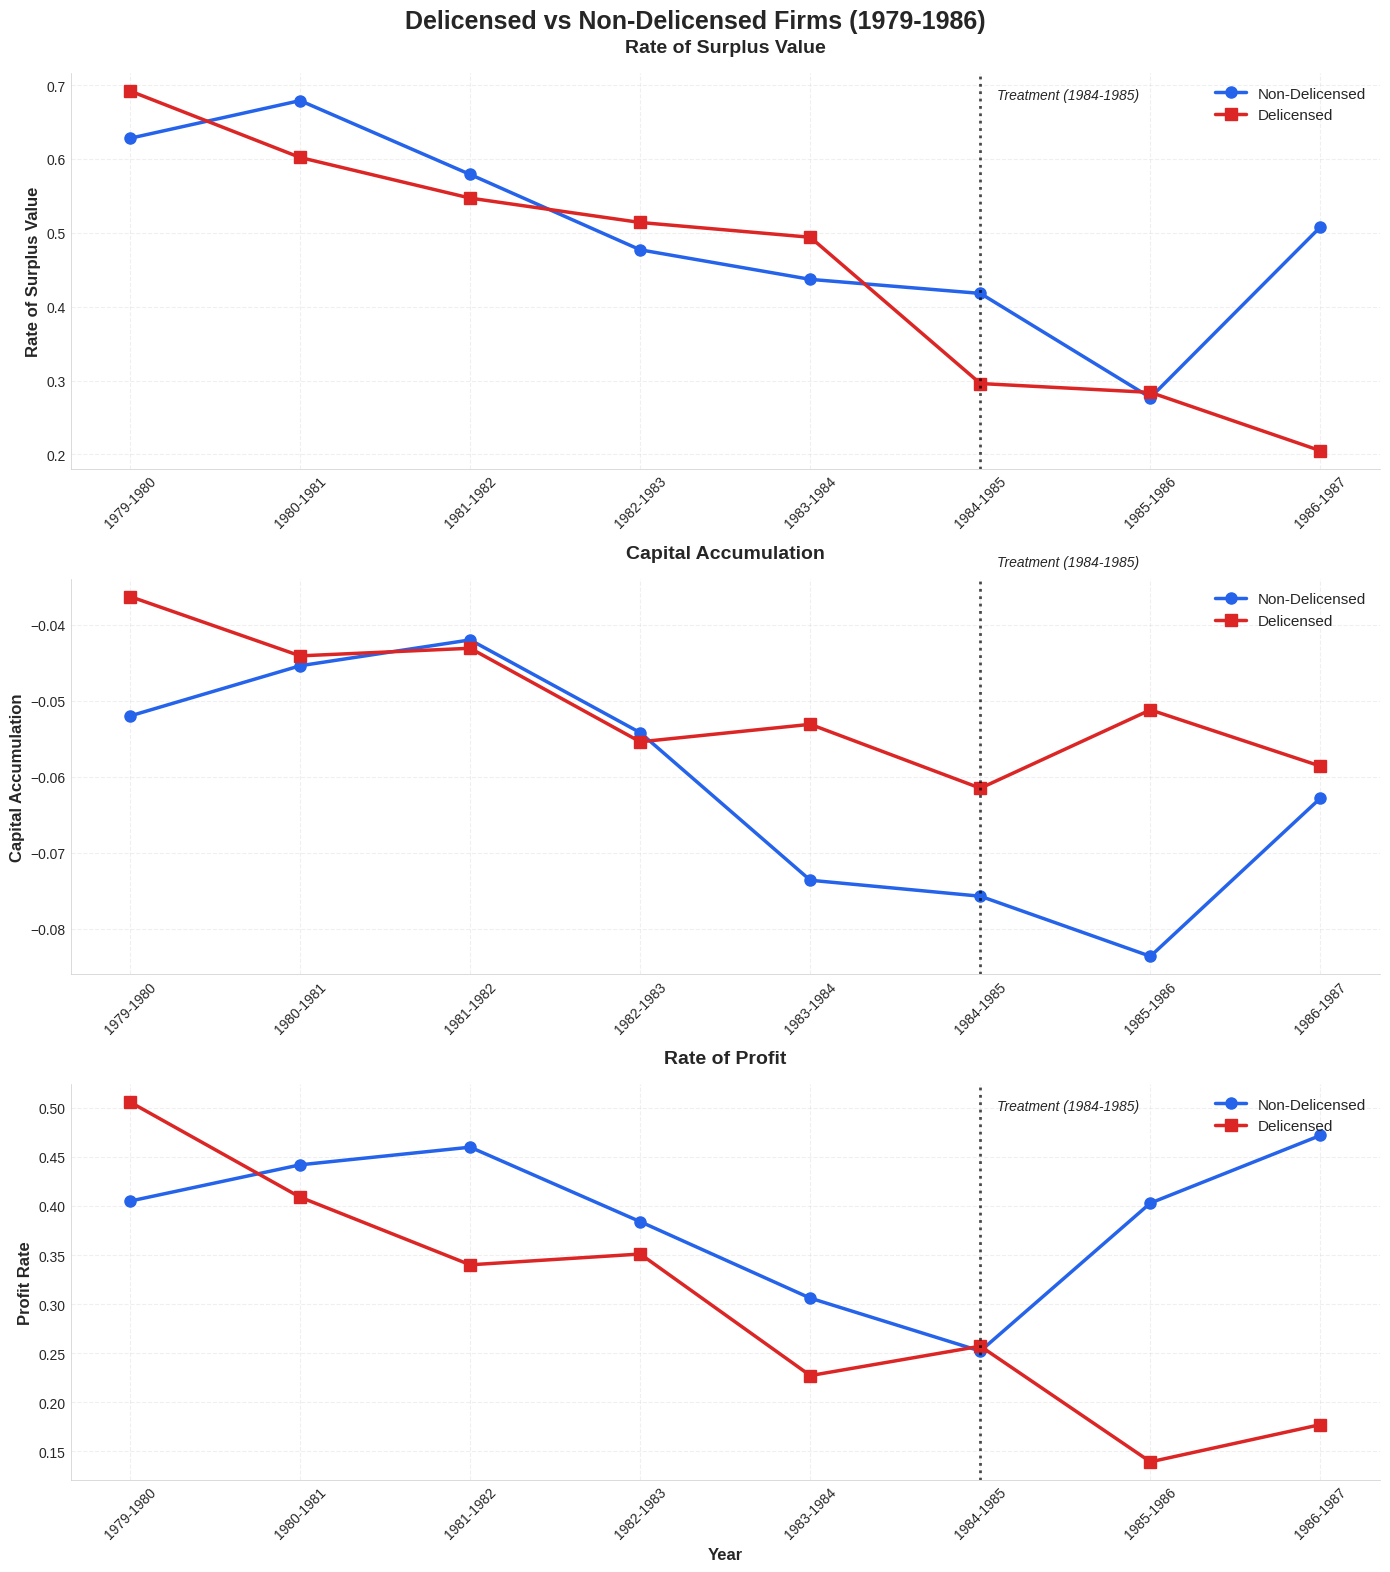

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ROSV data
rosv_data = {
    'year': ['1979_1980', '1979_1980', '1980_1981', '1980_1981', '1981_1982', '1981_1982',
             '1982_1983', '1982_1983', '1983_1984', '1983_1984', '1984_1985', '1984_1985',
             '1985_1986', '1985_1986', '1986_1987', '1986_1987'],
    'delin_group': [False, True, False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True],
    'mean_rosv': [0.628, 0.692, 0.679, 0.602, 0.579, 0.547, 0.477, 0.514, 0.437, 0.494,
                  0.418, 0.296, 0.277, 0.284, 0.508, 0.205],
    'delin_group_label': ['Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed']
}

# Capital formation data
capital_data = {
    'year': ['1979_1980', '1979_1980', '1980_1981', '1980_1981', '1981_1982', '1981_1982',
             '1982_1983', '1982_1983', '1983_1984', '1983_1984', '1984_1985', '1984_1985',
             '1985_1986', '1985_1986', '1986_1987', '1986_1987'],
    'delin_group': [False, True, False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True],
    'mean_k_form': [-0.0520, -0.0363, -0.0454, -0.0441, -0.0420, -0.0431, -0.0542, -0.0554,
                    -0.0736, -0.0531, -0.0757, -0.0615, -0.0836, -0.0512, -0.0628, -0.0586],
    'delin_group_label': ['Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed']
}

# Rate of profit data
profit_data = {
    'year': ['1979_1980', '1979_1980', '1980_1981', '1980_1981', '1981_1982', '1981_1982',
             '1982_1983', '1982_1983', '1983_1984', '1983_1984', '1984_1985', '1984_1985',
             '1985_1986', '1985_1986', '1986_1987', '1986_1987'],
    'delin_group': [False, True, False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True],
    'mean_profit_rate': [0.405, 0.506, 0.442, 0.409, 0.460, 0.340, 0.384, 0.351, 0.306, 0.227,
                         0.252, 0.257, 0.403, 0.139, 0.472, 0.177],
    'delin_group_label': ['Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed']
}

# Create DataFrames
df_rosv = pd.DataFrame(rosv_data)
df_capital = pd.DataFrame(capital_data)
df_profit = pd.DataFrame(profit_data)

# Convert year to numeric for plotting (use start year)
for df in [df_rosv, df_capital, df_profit]:
    df['year_numeric'] = df['year'].str[:4].astype(int)

fig, axes = plt.subplots(3, 1, figsize=(14, 16))
fig.suptitle('Delicensed vs Non-Delicensed Firms (1979-1986)',
             fontsize=18, fontweight='bold', y=0.98)

# Colors for consistency
colors = {'Non-Delicensed': '#2563eb', 'Delicensed': '#dc2626'}
markers = {'Non-Delicensed': 'o', 'Delicensed': 's'}

# Treatment year (1984-1985)
treatment_year = 1984

# Plot 1: ROSV
for group in [False, True]:
    data_subset = df_rosv[df_rosv['delin_group'] == group]
    label = 'Non-Delicensed' if not group else 'Delicensed'
    axes[0].plot(data_subset['year_numeric'], data_subset['mean_rosv'],
                marker=markers[label], linewidth=2.5, markersize=8,
                label=label, color=colors[label])

# Add vertical line for treatment
axes[0].axvline(x=treatment_year, color='black', linestyle=':', alpha=0.7, linewidth=2)
axes[0].text(treatment_year+0.1, axes[0].get_ylim()[1]*0.95, 'Treatment (1984-1985)',
            fontsize=10, style='italic')

axes[0].set_title('Rate of Surplus Value', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('Rate of Surplus Value', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(fontsize=11, loc='upper right')

# Plot 2: Capital Formation
for group in [False, True]:
    data_subset = df_capital[df_capital['delin_group'] == group]
    label = 'Non-Delicensed' if not group else 'Delicensed'
    axes[1].plot(data_subset['year_numeric'], data_subset['mean_k_form'],
                marker=markers[label], linewidth=2.5, markersize=8,
                label=label, color=colors[label])

# Add vertical line for treatment
axes[1].axvline(x=treatment_year, color='black', linestyle=':', alpha=0.7, linewidth=2)
axes[1].text(treatment_year+0.1, axes[1].get_ylim()[1]*0.95, 'Treatment (1984-1985)',
            fontsize=10, style='italic')

axes[1].set_title('Capital Accumulation', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Capital Accumulation', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

# Plot 3: Rate of Profit
for group in [False, True]:
    data_subset = df_profit[df_profit['delin_group'] == group]
    label = 'Non-Delicensed' if not group else 'Delicensed'
    axes[2].plot(data_subset['year_numeric'], data_subset['mean_profit_rate'],
                marker=markers[label], linewidth=2.5, markersize=8,
                label=label, color=colors[label])

# Add vertical line for treatment
axes[2].axvline(x=treatment_year, color='black', linestyle=':', alpha=0.7, linewidth=2)
axes[2].text(treatment_year+0.1, axes[2].get_ylim()[1]*0.95, 'Treatment (1984-1985)',
            fontsize=10, style='italic')

axes[2].set_title('Rate of Profit', fontsize=14, fontweight='bold', pad=15)
axes[2].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Profit Rate', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].legend(fontsize=11, loc='upper right')

# Customize all subplots
years = df_rosv[df_rosv['delin_group'] == False]['year_numeric'].values
for ax in axes:
    ax.set_xticks(years)
    ax.set_xticklabels([f"{y}-{y+1}" for y in years], rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()
